<a href="https://colab.research.google.com/github/roshanharip/House-Price-Prediction-System/blob/main/House_Price_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOUSE PRICE PREDICTION SYSTEM

---



##Collecting Data

In [26]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d yasserh/housing-prices-dataset

In [27]:
# !unzip /content/housing-prices-dataset.zip

##Importing Necessary Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Data Preprocessing

In [29]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [31]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


###Data Visualization

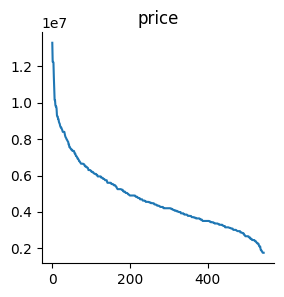

In [32]:
# @title price

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(3, 3), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

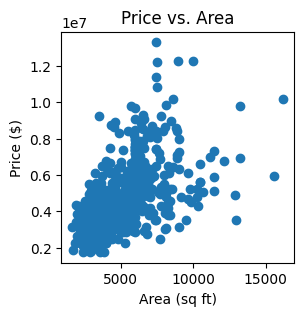

In [33]:
# @title Price vs Area
plt.figure(figsize=(3, 3))
plt.scatter(df['area'], df['price'])
# Add titles and labels
plt.title('Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

<ipython-input-34-c666a92655e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='price', y='mainroad', inner='box', palette='Dark2')


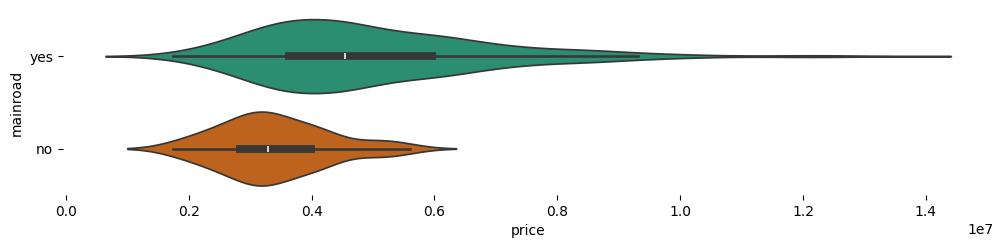

In [34]:
# @title mainroad vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['mainroad'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='price', y='mainroad', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

###Data Cleaning

In [35]:
df.mainroad = df.mainroad.map({'yes': 1, 'no': 0})
df.guestroom = df.guestroom.map({'yes': 1, 'no': 0})
df.basement = df.basement.map({'yes': 1, 'no': 0})
df.hotwaterheating = df.hotwaterheating.map({'yes': 1, 'no': 0})
df.airconditioning = df.airconditioning.map({'yes': 1, 'no': 0})
df.prefarea = df.prefarea.map({'yes': 1, 'no': 0})

In [36]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [37]:
df = pd.get_dummies(df, columns=['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [38]:
df['furnishingstatus_furnished'] = df['furnishingstatus_furnished'].map({True:1,False:0})
df['furnishingstatus_semi-furnished'] = df['furnishingstatus_semi-furnished'].map({True:1,False:0})
df['furnishingstatus_unfurnished'] = df['furnishingstatus_unfurnished'].map({True:1,False:0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [39]:
# Select features for scaling


In [40]:
x, y = df.drop('price', axis=1), df['price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
model.score(x_train, y_train)

0.6859438988560158

In [45]:
model.score(x_test, y_test)

0.6427838635222574

In [47]:
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred) #Using small dataset which increase MSE for better MSE use large dataset

1805574054959.9758

In [48]:
r2_score(y_test, y_pred)

0.6427838635222574